# **1. Perkenalan Dataset**


Dataset yang digunakan pada proyek ini berasal dari platform kaggle [Dataset Kesejahteraan Pekerja Indonesia](https://www.kaggle.com/datasets/wowevan/dataset-kesejahteraan-pekerja-indonesia) yang terdiri dari 4 buah dataset saling berhubungan yaitu garis kemiskinan, minimum upah, pengeluaran, dan rata-rata upah. Berikut penjelasan singkat masing-masing kategori fitur dalam dataset:

**Garis Kemiskinan**

Memuat informasi tentang rata-rata upah pekerja per jam dengan pembagian berdasarkan provinsi dan tahun.
  * Provinsi : Nama provinsi
  * Jenis : Kategori pengeluaran
  * Daerah : Menunjukkan asal daerah
  * Tahun : Tahun pengumpulan data
  * Periode : Bulan pengumpulan data
  * GK : Nilai garis kemiskinan per kapita

**Minimum Upah**

Mencatat data tentang upah minimum provinsi (UMP) yang terdistribusi berdasarkan provinsi dan tahun
  * Provinsi : Nama provinsi
  * Tahun : Tahun pengumpulan data
  * UMP : Nilai upah minimum

**Pengeluaran**

berisi informasi tentang Rata-Rata Pengeluaran per Kapita, dengan pembagian berdasarkan provinsi, tahun, jenis pengeluaran, dan daerah tempat tinggal.
  * Provinsi : Nama provinsi
  * Jenis : Kategori pengeluaran
  * Daerah : Menunjukkan asal daerah
  * Tahun : Tahun pengumpulan data
  * Peng : Rata-rata pengeluaran per kapita

**Rata-Rata Upah**

memuat data Garis Kemiskinan per Kapita, dengan pemisahan berdasarkan provinsi, tahun, periode survei, jenis pengeluaran, dan daerah tempat tinggal.
  * Provinsi : Nama provinsi
  * Tahun : Tahun pengumpulan data
  * Upah : Rata-rata upah per kapita



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
#menyiapkan library agar colab dapat terhubung dengan google drive untuk memudahkan memuat dataset
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from itertools import combinations
from sklearn.decomposition import PCA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Dataset dipanggil melalui google drive yang telah dihubungkan menggunakan library drive
df_gk = pd.read_csv("/content/drive/MyDrive/Dataset/Kesejahteraan Pekerja/garisKemiskinan.csv")
df_mu = pd.read_csv("/content/drive/MyDrive/Dataset/Kesejahteraan Pekerja/minUpah.csv")
df_pe = pd.read_csv("/content/drive/MyDrive/Dataset/Kesejahteraan Pekerja/pengeluaran.csv")
df_ru = pd.read_csv("/content/drive/MyDrive/Dataset/Kesejahteraan Pekerja/rataRataUpah.csv")

menampilkan 5 baris pertama dari masing-masing dataset

In [ ]:
# Dataset Garis Kemiskinan
df_gk.head()

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


In [ ]:
# Dataset Minimum Upah
df_mu.head()

,provinsi,tahun,ump
0,ACEH,2002,330000.0
1,ACEH,2003,425000.0
2,ACEH,2004,550000.0
3,ACEH,2005,620000.0
4,ACEH,2006,820000.0


In [ ]:
# Dataset Pengeluaran
df_pe.head()

,provinsi,daerah,jenis,tahun,peng
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0


In [ ]:
# Dataset Rata-Rata Upah
df_ru.head()

,provinsi,tahun,upah
0,ACEH,2015,11226
1,ACEH,2016,13627
2,ACEH,2017,14809
3,ACEH,2018,13814
4,ACEH,2019,15065


Menggabungkan keempat dataset menjadi sebuah dataframe agar mudah dianalisis

In [ ]:
df_merge = pd.merge(df_gk, df_mu, on=['provinsi', 'tahun'], how='inner').merge(df_pe, on=['provinsi', 'tahun', 'daerah', 'jenis'], how='inner').merge(df_ru, on=['provinsi', 'tahun'], how='inner')
df_merge

,provinsi,jenis,daerah,tahun,periode,gk,ump,peng,upah
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0,1900000.0,466355.0,11226
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0,1900000.0,466355.0,11226
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0,2118500.0,548853.0,13627
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0,2118500.0,548853.0,13627
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0,1900000.0,395136.0,11226
...,...,...,...,...,...,...,...,...,...
5035,INDONESIA,TOTAL,PERDESAAN,2022,SEPTEMBER,513170.0,2729463.0,1028896.0,17542
5036,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2021,MARET,472525.0,2684743.0,1264589.0,18089
5037,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2021,SEPTEMBER,486168.0,2684743.0,1264589.0,18089
5038,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2022,MARET,505468.0,2729463.0,1327782.0,17542


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Memahami struktur data

In [ ]:
# Menampilkan informasi tentang dataset
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5040 non-null   object 
 1   jenis     5040 non-null   object 
 2   daerah    5040 non-null   object 
 3   tahun     5040 non-null   int64  
 4   periode   5040 non-null   object 
 5   gk        4992 non-null   float64
 6   ump       5040 non-null   float64
 7   peng      4992 non-null   float64
 8   upah      5040 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 354.5+ KB


In [ ]:
# Menampilkan statistik deskriptif keseluruhan dataset
df_merge.describe(include='all')

,provinsi,jenis,daerah,tahun,periode,gk,ump,peng,upah
count,5040,5040,5040,5040.000000,5040,4992.000000,5.040000e+03,4.992000e+03,5040.000000
unique,35,3,3,NaN,2,NaN,NaN,NaN,NaN
top,ACEH,MAKANAN,PERKOTAAN,NaN,MARET,NaN,NaN,NaN,NaN
freq,144,1680,1680,NaN,2520,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018.500000,NaN,303480.478966,2.311369e+06,7.596263e+05,16621.010714
std,NaN,NaN,NaN,2.291515,NaN,161774.812856,6.021348e+05,3.547308e+05,4364.422282
min,NaN,NaN,NaN,2015.000000,NaN,48561.000000,9.100000e+05,1.760280e+05,8525.000000
25%,NaN,NaN,NaN,2016.750000,NaN,138142.750000,1.877250e+06,5.010822e+05,13468.750000
50%,NaN,NaN,NaN,2018.500000,NaN,314506.000000,2.268432e+06,6.595245e+05,15845.000000
75%,NaN,NaN,NaN,2020.250000,NaN,413791.750000,2.688292e+06,9.457802e+05,18634.750000


## Menangani data hilang dan duplikat

In [ ]:
# Memeriksa missing value
missing_values = df_merge.isnull().sum()
missing_values[missing_values > 0]

,0
gk,48
peng,48


In [ ]:
# Menghapus missing value
df_merge.dropna(inplace=True)
df_merge.reset_index(drop=True, inplace=True) #melakukan reset index agar index pada data kembali terurut

In [ ]:
# Memeriksa kembali missing value
missing_values = df_merge.isnull().sum()
missing_values[missing_values > 0]

,0


In [ ]:
# Memeriksa baris duplikat
duplicates = df_merge.duplicated()
print("Baris duplikat:", df_merge[duplicates])

Baris duplikat: Empty DataFrame
Columns: [provinsi, jenis, daerah, tahun, periode, gk, ump, peng, upah]
Index: []


## Analisis Distribusi dan Korelasi serta Visualisasi Data

In [ ]:
# Menampilkan semua kolom dataframe
df_merge.columns

Index(['provinsi', 'jenis', 'daerah', 'tahun', 'periode', 'gk', 'ump', 'peng',
       'upah'],
      dtype='object')

In [ ]:
# Membuat variabel categorical dan numeric untuk memisahkan antara kolom kategorikal dan kolom numerik
categorical_columns = ['provinsi', 'jenis', 'daerah', 'periode']

numeric_columns = ['gk', 'ump', 'peng', 'upah']

# Menampilkan nilai unik masing-masing kolom kategorikal
for col in categorical_columns:
    print(f"\nValue counts for '{col}':")
    print(df_merge[col].unique())
    print("-" * 50)


Value counts for 'provinsi':
['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. BANGKA BELITUNG'
 'KEP. RIAU' 'DKI JAKARTA' 'JAWA BARAT' 'JAWA TENGAH' 'DI YOGYAKARTA'
 'JAWA TIMUR' 'BANTEN' 'BALI' 'NUSA TENGGARA BARAT' 'NUSA TENGGARA TIMUR'
 'KALIMANTAN BARAT' 'KALIMANTAN TENGAH' 'KALIMANTAN SELATAN'
 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA' 'SULAWESI UTARA' 'SULAWESI TENGAH'
 'SULAWESI SELATAN' 'SULAWESI TENGGARA' 'GORONTALO' 'SULAWESI BARAT'
 'MALUKU' 'MALUKU UTARA' 'PAPUA BARAT' 'PAPUA' 'INDONESIA']
--------------------------------------------------

Value counts for 'jenis':
['MAKANAN' 'NONMAKANAN' 'TOTAL']
--------------------------------------------------

Value counts for 'daerah':
['PERKOTAAN' 'PERDESAAN' 'PERDESAANPERKOTAAN']
--------------------------------------------------

Value counts for 'periode':
['MARET' 'SEPTEMBER']
--------------------------------------------------


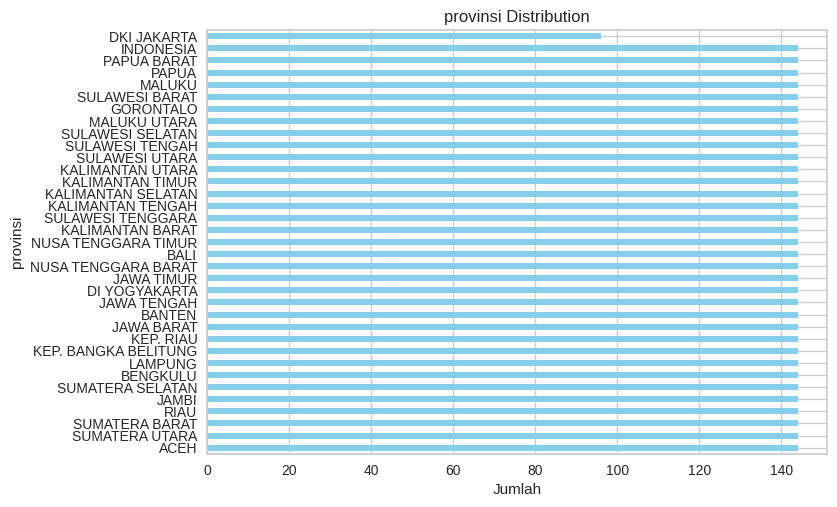

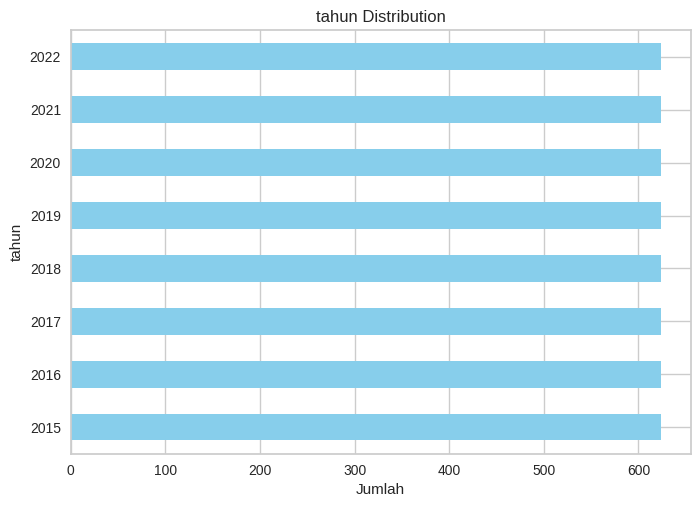

In [ ]:
# Menampilkan visualisasi distribusi kolom numerik (provinsi dan tahun) menggunakan bar chart horizontal
bar_columns = ['provinsi', 'tahun']
for col in bar_columns:
  labels = df_merge[col].value_counts()

  labels.plot(kind='barh', color='skyblue')
  plt.title(f'{col} Distribution')
  plt.xlabel('Jumlah')
  plt.ylabel(f'{col}')
  plt.show()

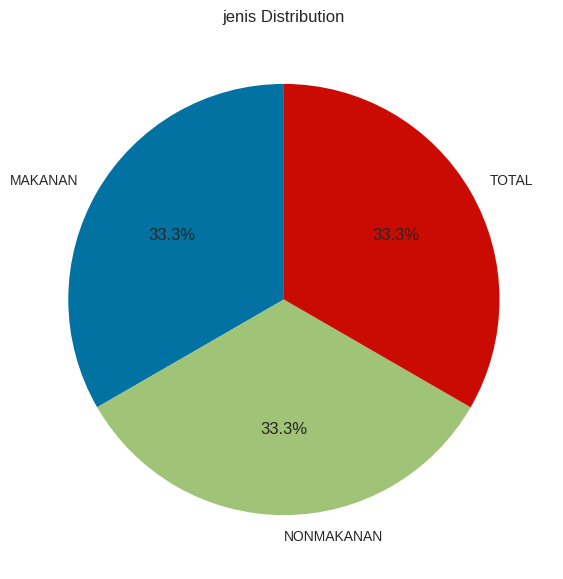

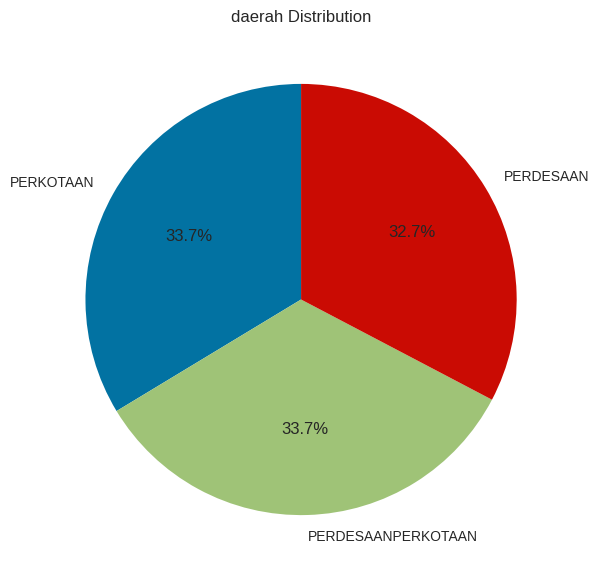

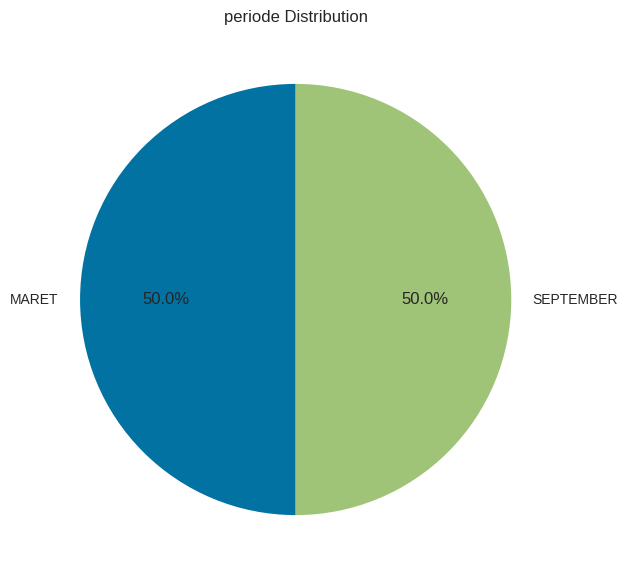

In [ ]:
# Menampilkan visualisasi distribusi kolom kategorikal menggunakan pie chart
pie_columns = ['jenis', 'daerah', 'periode']
for col in pie_columns:
    plt.figure(figsize=(7, 7))

    # Mengambil nilai unik pada setiap kolom
    value_counts = df_merge[col].value_counts()
    labels = value_counts.index

    # Membuat pie chart
    plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'{col} Distribution')

    plt.show()

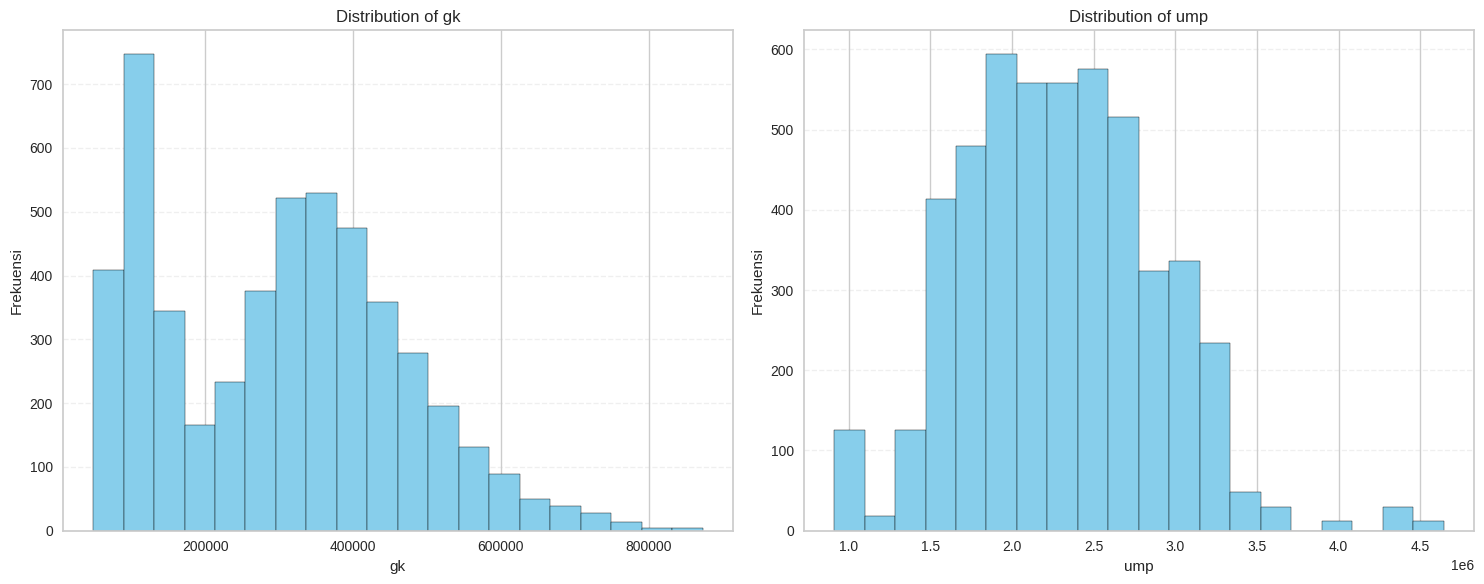

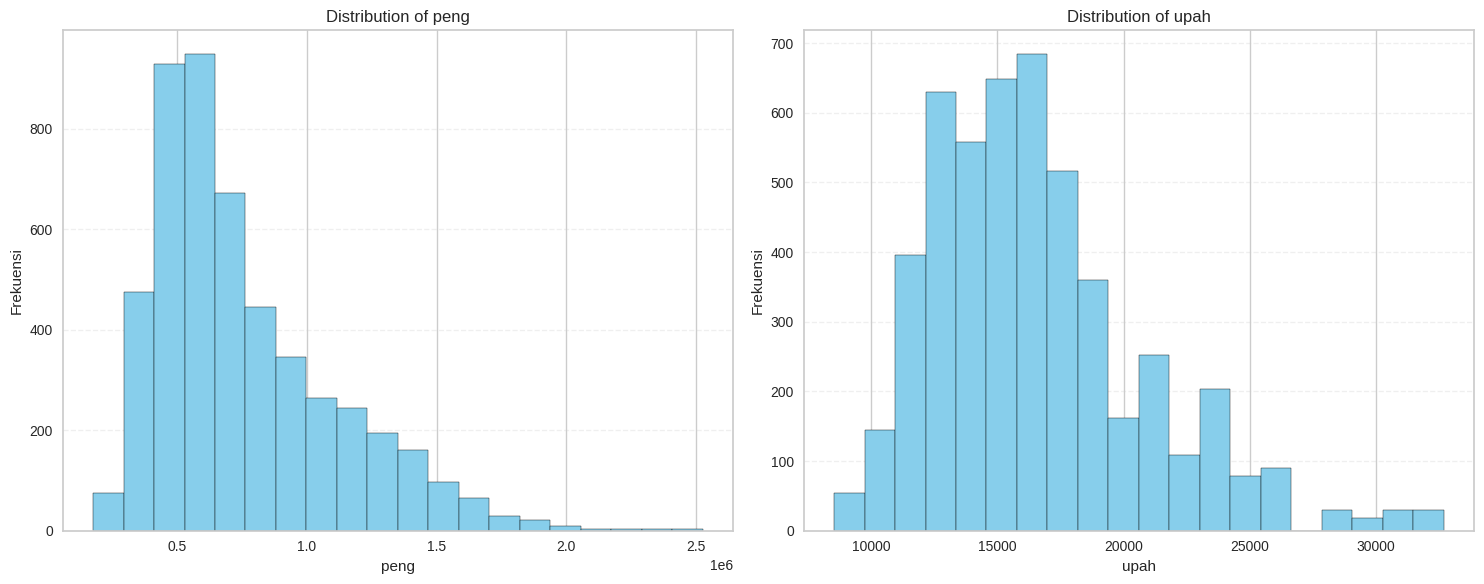

In [ ]:
# Menampilkan distribusi kolom numerik (gk, ump, peng, dan upah) menggunakan diagram histogram
i = 0
while i < len(numeric_columns):
    fig = plt.figure(figsize=[15, 6])

    # Plot Histogram
    plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, plot pertama
    plt.hist(df_merge[numeric_columns[i]], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(numeric_columns[i])
    plt.ylabel('Frekuensi')
    plt.title(f'Distribution of {numeric_columns[i]}')
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Move to the next column
    i += 1

    # Plot Boxplot jika ada lebih banyak kolom
    if i < len(numeric_columns):
        plt.subplot(1, 2, 2)  # Plot kedua
        plt.hist(df_merge[numeric_columns[i]], bins=20, color='skyblue', edgecolor='black')
        plt.xlabel(numeric_columns[i])
        plt.ylabel('Frekuensi')
        plt.title(f'Distribution of {numeric_columns[i]}')
        plt.grid(axis='y', linestyle='--', alpha=0.3)

    plt.tight_layout()  # Mengatur agar subplot tidak tumpang tindih
    plt.show()
    i += 1  # Memastikan loop bergerak ke kolom berikutnya

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Deteksi dan Penanganan Outliers

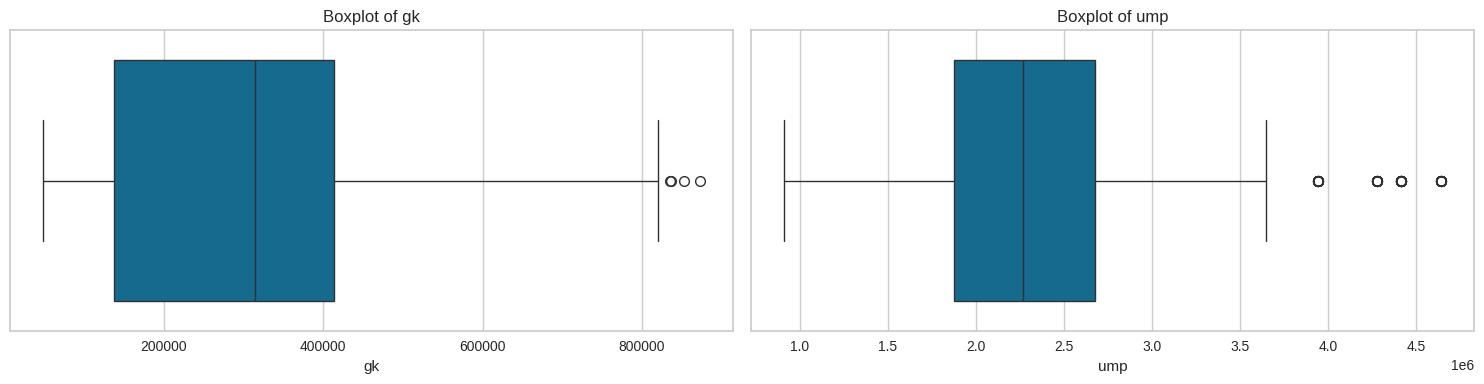

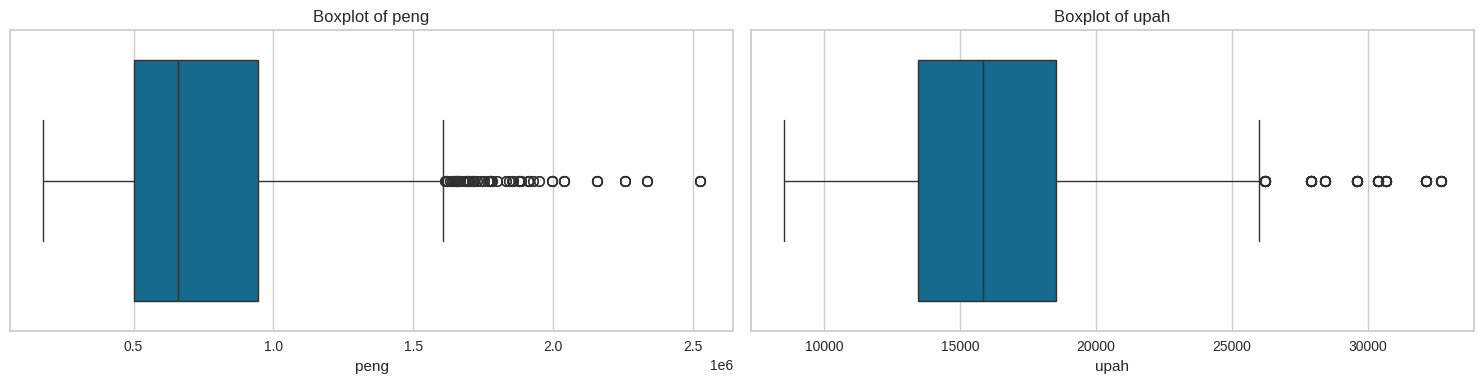

In [ ]:
# Menampilkan visualisasi kolom numerik (gk, ump, peng, upah) menggunakan Boxplot untuk mendeteksi apakah terdapat outliers
i = 0
while i < len(numeric_columns):
  fig = plt.figure(figsize =[15, 4])

  plt.subplot(1,2,1)
  sns.boxplot(x=numeric_columns[i], data=df_merge)
  plt.title(f'Boxplot of {numeric_columns[i]}')
  i+=1
  if i < len(numeric_columns):
    plt.subplot(1,2,2)
    sns.boxplot(x=numeric_columns[i], data=df_merge)
    plt.title(f'Boxplot of {numeric_columns[i]}')
    i+=1

  plt.tight_layout()
  plt.show()

In [ ]:
# Mengganti nilai outlier dengan batas nilai terdekat

for col in numeric_columns:
    Q1 = df_merge[col].quantile(0.25)  # Kuartil pertama
    Q3 = df_merge[col].quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Rentang antar kuartil

    lower_bound = Q1 - 1.5 * IQR  # Batas bawah outlier
    upper_bound = Q3 + 1.5 * IQR  # Batas atas outlier

    # Mengganti nilai outlier dengan batas terdekat
    df_merge[col] = np.where(df_merge[col] < lower_bound, lower_bound,
                       np.where(df_merge[col] > upper_bound, upper_bound, df_merge[col]))

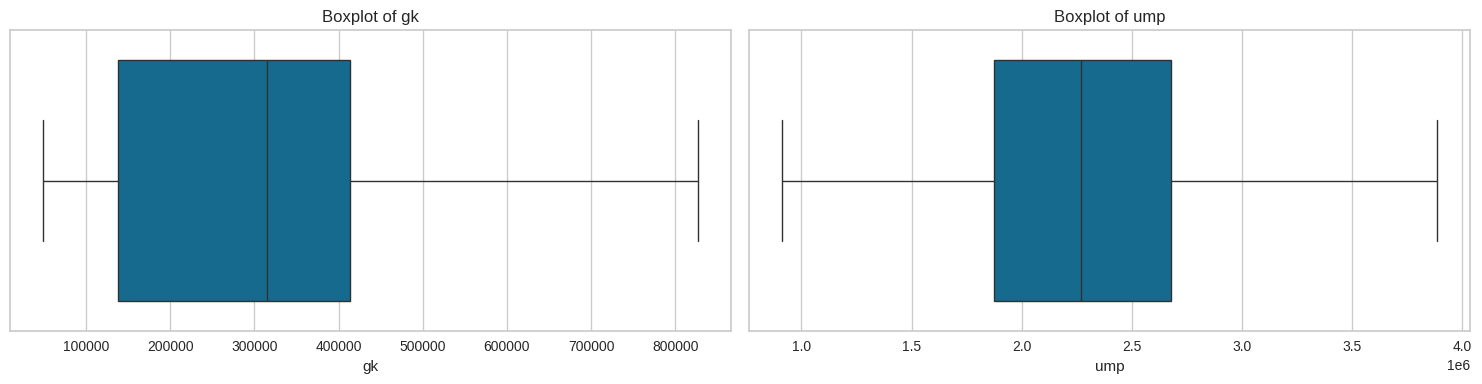

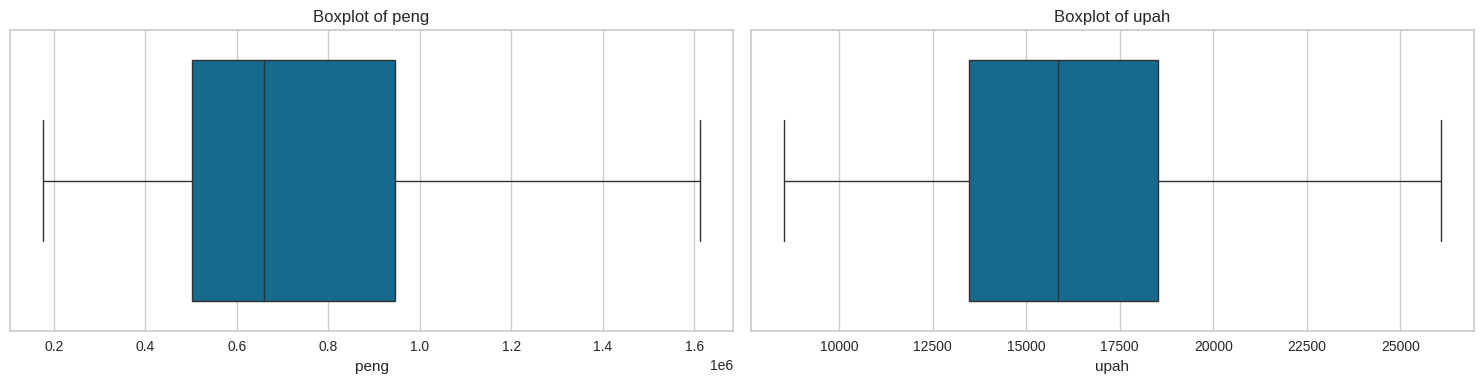

In [ ]:
# Menampilkan kembali visualisasi kolom numerik (gk, ump, peng, dan upah) menggunakan boxplot setelah penanganan outliers
i = 0
while i < len(numeric_columns):
  fig = plt.figure(figsize =[15, 4])

  plt.subplot(1,2,1)
  sns.boxplot(x=numeric_columns[i], data=df_merge)
  plt.title(f'Boxplot of {numeric_columns[i]}')
  i+=1
  if i < len(numeric_columns):
    plt.subplot(1,2,2)
    sns.boxplot(x=numeric_columns[i], data=df_merge)
    plt.title(f'Boxplot of {numeric_columns[i]}')
    i+=1

  plt.tight_layout()
  plt.show()

## Encoding Data Kategorikal

In [ ]:
# Menampilkan kembali kolom kategorikal yang telah dipisahkan sebelumnya
df_merge[categorical_columns]

,provinsi,jenis,daerah,periode
0,ACEH,MAKANAN,PERKOTAAN,MARET
1,ACEH,MAKANAN,PERKOTAAN,SEPTEMBER
2,ACEH,MAKANAN,PERKOTAAN,MARET
3,ACEH,MAKANAN,PERKOTAAN,SEPTEMBER
4,ACEH,MAKANAN,PERDESAAN,MARET
...,...,...,...,...
4987,INDONESIA,TOTAL,PERDESAAN,SEPTEMBER
4988,INDONESIA,TOTAL,PERDESAANPERKOTAAN,MARET
4989,INDONESIA,TOTAL,PERDESAANPERKOTAAN,SEPTEMBER
4990,INDONESIA,TOTAL,PERDESAANPERKOTAAN,MARET


In [ ]:
# Melakukan One Hot Encoding untuk mengubah kolom kategorikal menjadi numerik
df_encode = df_merge.copy()
encoder = OneHotEncoder(sparse_output=False)
encoded_df = pd.DataFrame(
    encoder.fit_transform(df_merge[['jenis', 'daerah']]),
    columns=encoder.get_feature_names_out(['jenis', 'daerah']),
    index=df_merge.index
)

df_encode = pd.concat([df_encode, encoded_df], axis=1)

Kolom kategorikal yang diubah hanya kolom 'jenis' dan 'daerah' karena kolom ini yang akan digunakan untuk proses clustering dan dianggap dapat memberikan informasi tambahan dibandingkan kolom sisanya, kemudian untuk penggunaan one hot encoding dipilih karena teknik ini dapat menjaga nilai kategorikal tanpa mengubah makna data dan mencegah pemberian bobot yang salah pada data kategorikal

In [ ]:
# Menampilkan data hasil encoding
df_encode

,provinsi,jenis,daerah,tahun,periode,gk,ump,peng,upah,jenis_MAKANAN,jenis_NONMAKANAN,jenis_TOTAL,daerah_PERDESAAN,daerah_PERDESAANPERKOTAAN,daerah_PERKOTAAN
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0,1900000.0,466355.0,11226.0,1.0,0.0,0.0,0.0,0.0,1.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0,1900000.0,466355.0,11226.0,1.0,0.0,0.0,0.0,0.0,1.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0,2118500.0,548853.0,13627.0,1.0,0.0,0.0,0.0,0.0,1.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0,2118500.0,548853.0,13627.0,1.0,0.0,0.0,0.0,0.0,1.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0,1900000.0,395136.0,11226.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,INDONESIA,TOTAL,PERDESAAN,2022,SEPTEMBER,513170.0,2729463.0,1028896.0,17542.0,0.0,0.0,1.0,1.0,0.0,0.0
4988,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2021,MARET,472525.0,2684743.0,1264589.0,18089.0,0.0,0.0,1.0,0.0,1.0,0.0
4989,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2021,SEPTEMBER,486168.0,2684743.0,1264589.0,18089.0,0.0,0.0,1.0,0.0,1.0,0.0
4990,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2022,MARET,505468.0,2729463.0,1327782.0,17542.0,0.0,0.0,1.0,0.0,1.0,0.0


## Normalisasi Fitur

In [ ]:
# Melakukan normalisasi pada fitur numerik karena memiliki rentang skala nilai yang sangat bervariasi
scaler = MinMaxScaler()

df_encode[numeric_columns] = scaler.fit_transform(df_encode[numeric_columns])

# Menampilkan data hasil normalisasi
df_encode.head()

,provinsi,jenis,daerah,tahun,periode,gk,ump,peng,upah,jenis_MAKANAN,jenis_NONMAKANAN,jenis_TOTAL,daerah_PERDESAAN,daerah_PERDESAANPERKOTAAN,daerah_PERKOTAAN
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,0.314800,0.332811,0.202065,0.153754,1.0,0.0,0.0,0.0,0.0,1.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,0.325627,0.332811,0.202065,0.153754,1.0,0.0,0.0,0.0,0.0,1.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,0.330911,0.406265,0.259483,0.290431,1.0,0.0,0.0,0.0,0.0,1.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,0.348280,0.406265,0.259483,0.290431,1.0,0.0,0.0,0.0,0.0,1.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,0.319657,0.332811,0.152497,0.153754,1.0,0.0,0.0,1.0,0.0,0.0


Normalisasi dilakukan karena kolom numerik yang digunakan (gk, ump, peng, dan upah) memiliki rentang nilai yang sangat bervariasi sehingga harus diselaraskan dengan teknik normalisasi

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

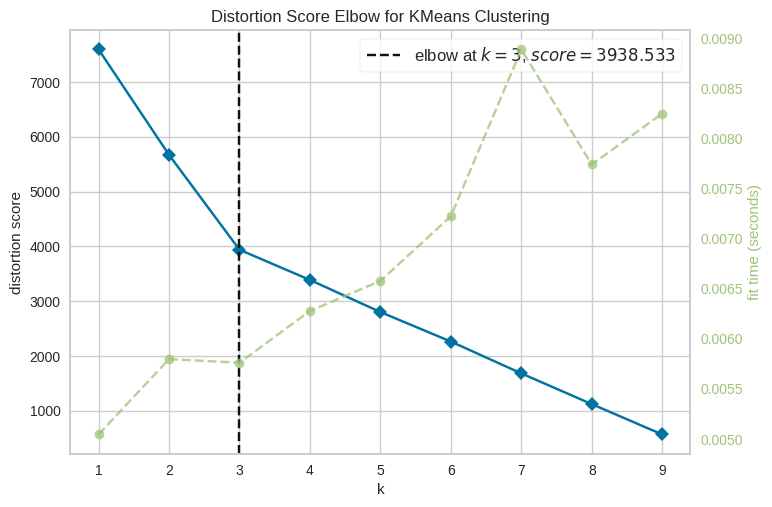

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Membuat variabel untuk data training
X = df_encode.iloc[:, 5:]

# Insialisasi model KMeans default
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Melakukan fit visualizer untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

Menggunakan algoritma KMeans untuk melakukan clustering dan teknik KElbow untuk menentukan jumlah cluster yang optimal

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
# Melatih model dengan parameter optimal
kmeans = KMeans(
    n_clusters=3,           # jumlah cluster yang diinginkan
    init='k-means++',       # inisialisasi pusat cluster
    n_init=10,              # coba 10 kali inisialisasi berbeda, ambil terbaik
    max_iter=300,           # iterasi maksimal untuk konvergensi
    tol=0.0001,             # Toleransi konvergensi
    random_state=42,        # untuk hasil yang konsisten
    algorithm='elkan'
)

# Fit model ke data
kmeans.fit(X)

labels = kmeans.fit_predict(X)

# Hitung Silhouette Score
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.400


Kode diatas dilakukan untuk melihat performa awal model awal sebelum dilakukan seleksi fitur dan reduksi dimensi dimana model mampu menghasilkan skor silhoutte sebesar 0.400

## **c. Feature Selection**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Mencari 5 fitur terbaik dari 10 fitur awal ('gk', 'ump', 'peng', 'upah', 'jenis_MAKANAN', 'jenis_NONMAKANAN',
       'jenis_TOTAL', 'daerah_PERDESAAN', 'daerah_PERDESAANPERKOTAAN',
       'daerah_PERKOTAAN') berdasarkan score silhoute dan komponen PCA terbaik dengan menggunakan metode Exhaustive Feature Selection.

In [ ]:
# Menyimpan fitur encoding agar tidak di eliminasi selama proses seleksi fitur
encoding_features = ['jenis_MAKANAN', 'jenis_NONMAKANAN', 'jenis_TOTAL',
                   'daerah_PERDESAAN', 'daerah_PERDESAANPERKOTAAN', 'daerah_PERKOTAAN']

# Fitur yang akan dieliminasi berdasarkan performa terburuk
nonencoding_features = ['gk', 'ump', 'peng', 'upah']

# Menentukan jumlah total fitur yang diinginkan
total_input_features = 9

best_features = []
best_score = -1

print(f"Mencari kombinasi fitur terbaik ")

# Cari kombinasi dari fitur numerik
for num_subset in combinations(nonencoding_features, total_input_features - len(encoding_features)):
    feature_subset = list(num_subset) + encoding_features
    X_subset = X[feature_subset]

    # Coba PCA dari 2 sampai total jumlah fitur untuk memaksimalkan silhoutte score
    for n_components in range(2, total_input_features + 1):
        pca = PCA(n_components=n_components, random_state=42)
        X_pca = pca.fit_transform(X_subset)

        # Clustering
        kmeans = KMeans(
            n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=0.0001,
            random_state=42,
            algorithm='elkan'
        )
        labels = kmeans.fit_predict(X_pca)

        # Evaluasi skor silhoutte
        score = silhouette_score(X_pca, labels)

        print(f"Fitur: {feature_subset}, PCA: {n_components}, Silhouette Score: {score:.4f}")

        if score > best_score:
            best_score = score
            best_features = feature_subset
            best_pca_components = n_components

# Menampilkan kombinasi fitur terbaik dengan jumlah komponen PCA dan skor silhoutte
print("\n\n")
print(f"Best features       : {best_features}")
print(f"PCA components      : {best_pca_components}")
print(f"Silhouette Score    : {best_score:.4f}")

Mencari kombinasi fitur terbaik 
Fitur: ['gk', 'ump', 'peng', 'jenis_MAKANAN', 'jenis_NONMAKANAN', 'jenis_TOTAL', 'daerah_PERDESAAN', 'daerah_PERDESAANPERKOTAAN', 'daerah_PERKOTAAN'], PCA: 2, Silhouette Score: 0.7127
Fitur: ['gk', 'ump', 'peng', 'jenis_MAKANAN', 'jenis_NONMAKANAN', 'jenis_TOTAL', 'daerah_PERDESAAN', 'daerah_PERDESAANPERKOTAAN', 'daerah_PERKOTAAN'], PCA: 3, Silhouette Score: 0.5407
Fitur: ['gk', 'ump', 'peng', 'jenis_MAKANAN', 'jenis_NONMAKANAN', 'jenis_TOTAL', 'daerah_PERDESAAN', 'daerah_PERDESAANPERKOTAAN', 'daerah_PERKOTAAN'], PCA: 4, Silhouette Score: 0.4696
Fitur: ['gk', 'ump', 'peng', 'jenis_MAKANAN', 'jenis_NONMAKANAN', 'jenis_TOTAL', 'daerah_PERDESAAN', 'daerah_PERDESAANPERKOTAAN', 'daerah_PERKOTAAN'], PCA: 5, Silhouette Score: 0.4322
Fitur: ['gk', 'ump', 'peng', 'jenis_MAKANAN', 'jenis_NONMAKANAN', 'jenis_TOTAL', 'daerah_PERDESAAN', 'daerah_PERDESAANPERKOTAAN', 'daerah_PERKOTAAN'], PCA: 6, Silhouette Score: 0.4256
Fitur: ['gk', 'ump', 'peng', 'jenis_MAKANAN', '

Melatih kembali model KMeans setelah seleksi fitur

In [ ]:
# Menyimpan kombinasi fitur terbaik kedalam variabel X_best
X_best = X[best_features]

# Menginputkan kembali parameter hasil seleksi fitur
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_best)

kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=42,
    algorithm='elkan'
)

kmeans.fit(X_pca)

# Mendapatkan label cluster
labels = kmeans.labels_

# Hitung kembali Silhouette Score
score = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.7127


Hasil skor silhoutte setelah proses seleksi fitur : **0.7127**

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

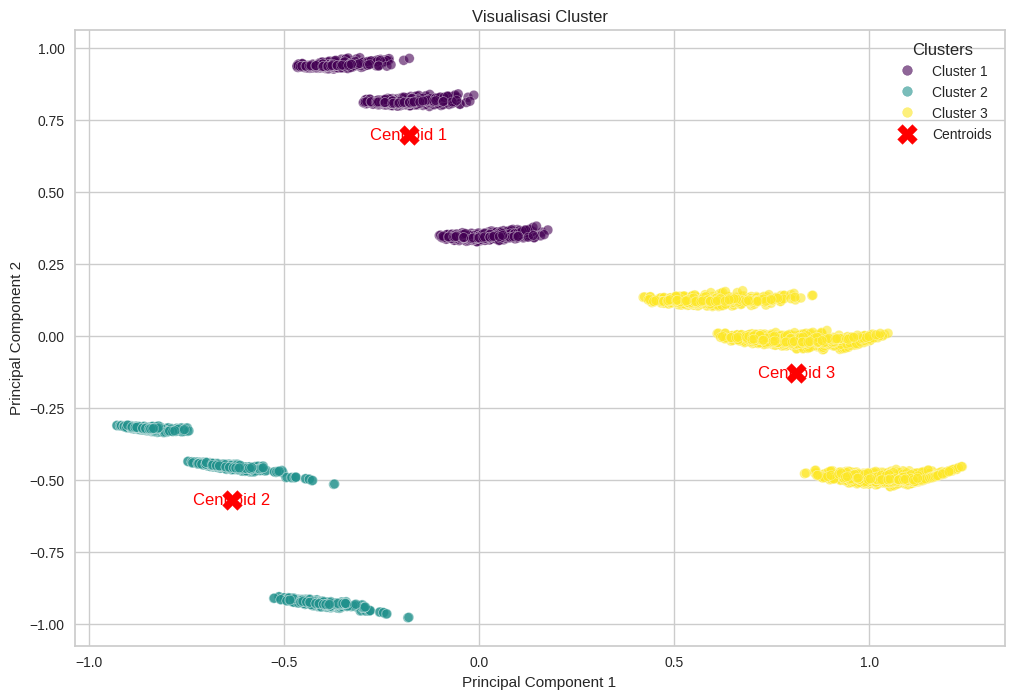

Nilai Centroids dalam ruang PCA:
Centroid 1: PC1 = -0.18, PC2 = 0.70
Centroid 2: PC1 = -0.63, PC2 = -0.57
Centroid 3: PC1 = 0.81, PC2 = -0.13


In [ ]:
# Menampilkan visualisasi dengan 2D PCA projection
plt.figure(figsize=(12, 8))

# Plot data points dengan warna sesuai dengan cluster
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
centroid_marker = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan teks centroid pada label
for i, centroid in enumerate(kmeans.cluster_centers_):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Tambahkan legenda untuk cluster dan centroid
handles, labels_legend = scatter.legend_elements()

plt.legend(handles=handles + [centroid_marker], labels=[f'Cluster {i+1}' for i in range(3)] + ['Centroids'], title='Clusters')

# Menambahkan Judul dan label sumbu
plt.title('Visualisasi Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

# Menampilkan nilai centroid hasil visualisasi
print("Nilai Centroids dalam ruang PCA:")
for i, centroid in enumerate(kmeans.cluster_centers_):
    print(f"Centroid {i+1}: PC1 = {centroid[0]:.2f}, PC2 = {centroid[1]:.2f}")

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Melakukan inverse encoding
X_best[['jenis', 'daerah']] = encoder.inverse_transform(df_encode[['jenis_MAKANAN', 'jenis_NONMAKANAN', 'jenis_TOTAL',
       'daerah_PERDESAAN', 'daerah_PERDESAANPERKOTAAN', 'daerah_PERKOTAAN']])

# Menghapus kolom hasil encoding
X_best.drop(columns=['jenis_MAKANAN', 'jenis_NONMAKANAN', 'jenis_TOTAL',
       'daerah_PERDESAAN', 'daerah_PERDESAANPERKOTAAN', 'daerah_PERKOTAAN'], inplace=True)

# Menambahkan kolom hasil cluster
X_best['Cluster'] = labels

# Menampilkan data hasil inverse encoding
X_best.head(5)

,gk,ump,peng,jenis,daerah,Cluster
0,0.314800,0.332811,0.202065,MAKANAN,PERKOTAAN,0
1,0.325627,0.332811,0.202065,MAKANAN,PERKOTAAN,0
2,0.330911,0.406265,0.259483,MAKANAN,PERKOTAAN,0
3,0.348280,0.406265,0.259483,MAKANAN,PERKOTAAN,0
4,0.319657,0.332811,0.152497,MAKANAN,PERDESAAN,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Melakukan inverse normalisasi
X_best[numeric_columns] = scaler.inverse_transform(df_encode[numeric_columns])
X_best.drop(columns='upah', inplace=True)

# Menampilkan kolom hasil inverse
X_best.head()

,gk,ump,peng,jenis,daerah,Cluster
0,293697.0,1900000.0,466355.0,MAKANAN,PERKOTAAN,0
1,302128.0,1900000.0,466355.0,MAKANAN,PERKOTAAN,0
2,306243.0,2118500.0,548853.0,MAKANAN,PERKOTAAN,0
3,319768.0,2118500.0,548853.0,MAKANAN,PERKOTAAN,0
4,297479.0,1900000.0,395136.0,MAKANAN,PERDESAAN,0
...,...,...,...,...,...,...
4987,513170.0,2729463.0,1028896.0,TOTAL,PERDESAAN,2
4988,472525.0,2684743.0,1264589.0,TOTAL,PERDESAANPERKOTAAN,2
4989,486168.0,2684743.0,1264589.0,TOTAL,PERDESAANPERKOTAAN,2
4990,505468.0,2729463.0,1327782.0,TOTAL,PERDESAANPERKOTAAN,2


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Menampilkan nilai rata-rata untuk setiap cluster pada kolom numerik
cluster_means = X_best.groupby('Cluster')[['gk', 'ump', 'peng']].mean()

# Menampilkan nilai modus untuk kolom kategorikal
cluster_modes = X_best.groupby('Cluster')[['jenis', 'daerah']].agg(lambda x: x.mode()[0])

# Menggabungkan hasil rata-rata numerik dan mode untuk kategorikal
cluster_summary = pd.concat([cluster_means, cluster_modes], axis=1)

# Mengubah ke format mata uang agar lebih mudah dianalisis
def format_currency(value):
    return f"Rp {value:,.2f}"

# Menampilkan hasil interoretasi
for cluster_id, row in cluster_summary.iterrows():
    print(f"Cluster {cluster_id}")
    print(f"Jenis Pengeluaran          : {row['jenis']}")
    print(f"Daerah Tinggal             : {row['daerah']}")
    print(f"Rata-Rata Garis Kemiskinan : {format_currency(row['gk'])}")
    print(f"Rata-Rata Minimum Upah     : {format_currency(row['ump'])}")
    print(f"Rata-Rata Pengeluaran      : {format_currency(row['peng'])}")
    print("\n")

Cluster 0
Jenis Pengeluaran          : MAKANAN
Daerah Tinggal             : PERDESAANPERKOTAAN
Rata-Rata Garis Kemiskinan : Rp 337,492.03
Rata-Rata Minimum Upah     : Rp 2,295,813.88
Rata-Rata Pengeluaran      : Rp 564,947.01


Cluster 1
Jenis Pengeluaran          : NONMAKANAN
Daerah Tinggal             : PERDESAANPERKOTAAN
Rata-Rata Garis Kemiskinan : Rp 117,728.66
Rata-Rata Minimum Upah     : Rp 2,295,813.88
Rata-Rata Pengeluaran      : Rp 574,492.31


Cluster 2
Jenis Pengeluaran          : TOTAL
Daerah Tinggal             : PERDESAANPERKOTAAN
Rata-Rata Garis Kemiskinan : Rp 455,167.74
Rata-Rata Minimum Upah     : Rp 2,295,813.88
Rata-Rata Pengeluaran      : Rp 1,122,951.03




Tulis hasil interpretasinya di sini.
1. Cluster 1:

  *   Jenis Pengeluaran       : MAKANAN
  *   Daerah Tinggal   : PERDESAANPERKOTAAN
  *   Rata-Rata Garis Kemiskinan : Rp 337,492.03
  *   Rata-Rata Minimum Upah     : Rp 2,295,813.88
  *   Rata-Rata Pengeluaran      : Rp 564,947.01


2. Cluster 2:

  *   Jenis Pengeluaran       : NONMAKANAN
  *   Daerah Tinggal          : PERDESAANPERKOTAAN
  *   Rata-Rata Garis Kemiskinan : Rp 117,728.66
  *   Rata-Rata Minimum Upah     : Rp 2,295,813.88
  *   Rata-Rata Pengeluaran      : Rp 574,492.31

3. Cluster 3:

  *   Jenis Pengeluaran       : TOTAL
  *   Daerah Tinggal           : PERDESAANPERKOTAAN
  *   Rata-Rata Garis Kemiskinan : Rp 455,167.74
  *   Rata-Rata Minimum Upah     : Rp 2,295,813.88
  *   Rata-Rata Pengeluaran      : Rp 1,122,951.03

Hasil interpretasi menunjukkan bahwa segementasi berdasarkan jenis pengeluaran dan daerah tinggal sesuai dengan ekspektasi, sehingga pola ini dapat dimanfaatkan untuk menyesuaikan strategi pemasaran dan penawaran produk sesuai kemampuan finansial masing-masing cluster

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Jenis Pengeluaran :** MAKANAN  
- **Daerah Tinggal :** PERDESAANPERKOTAAN
- **Rata-rata Garis Kemiskinan (Rp):** Rp 337,492.03
- **Rata-rata Minimum Upah (Rp):** Rp 2,295,813.88  
- **Rata-rata Pengeluaran (Rp):** Rp 564,947.01
- **Analisis:** Cluster ini menunjukkan kelompok dengan pengeluaran tinggi pada makanan dan garis kemiskinan yang moderat (menengah), sehingga mencerminkan segmen pasar dengan pengeluaran untuk kebutuhan pokok yang cocok untuk produk makanan dengan harga terjangkau.

## Cluster 2:
- **Jenis Pengeluaran :** NONMAKANAN  
- **Daerah Tinggal :** PERDESAANPERKOTAAN
- **Rata-rata Garis Kemiskinan (Rp):** Rp 117,728.66
- **Rata-rata Minimum Upah (Rp):** Rp 2,295,813.88  
- **Rata-rata Pengeluaran (Rp):** Rp 574,492.31
- **Analisis:** Cluster ini menunjukkan kelompok yang lebih fokus pada pengeluaran non makanan dan memiliki garis kemiskinan lebih rendah, sehingga mencerminkan segmen pasar yang sensitif terhadap harga dan lebih membutuhkan produk perumahan, kesehatan, atau pendidikan dengan harga terjangkau.

## Cluster 3:
- **Jenis Pengeluaran :** TOTAL
- **Daerah Tinggal :** PERDESAANPERKOTAAN
- **Rata-rata Garis Kemiskinan (Rp):** Rp 455,167.74
- **Rata-rata Minimum Upah (Rp):** Rp 2,295,813.88  
- **Rata-rata Pengeluaran (Rp):** Rp 1,122,951.03
- **Analisis:** Cluster ini memiliki pengeluaran total yang sangat tinggi dengan garis kemiskinan yang lebih besar, sehingga mencerminkan segmen dengan daya beli lebih tinggi yang bisa dipasarkan dengan produk atau layanan berkualitas tinggi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
from google.colab import files
# Simpan ke csv
X_best.to_csv('clustering.csv', index=False)

# Download file ke lokal
files.download('clustering.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>